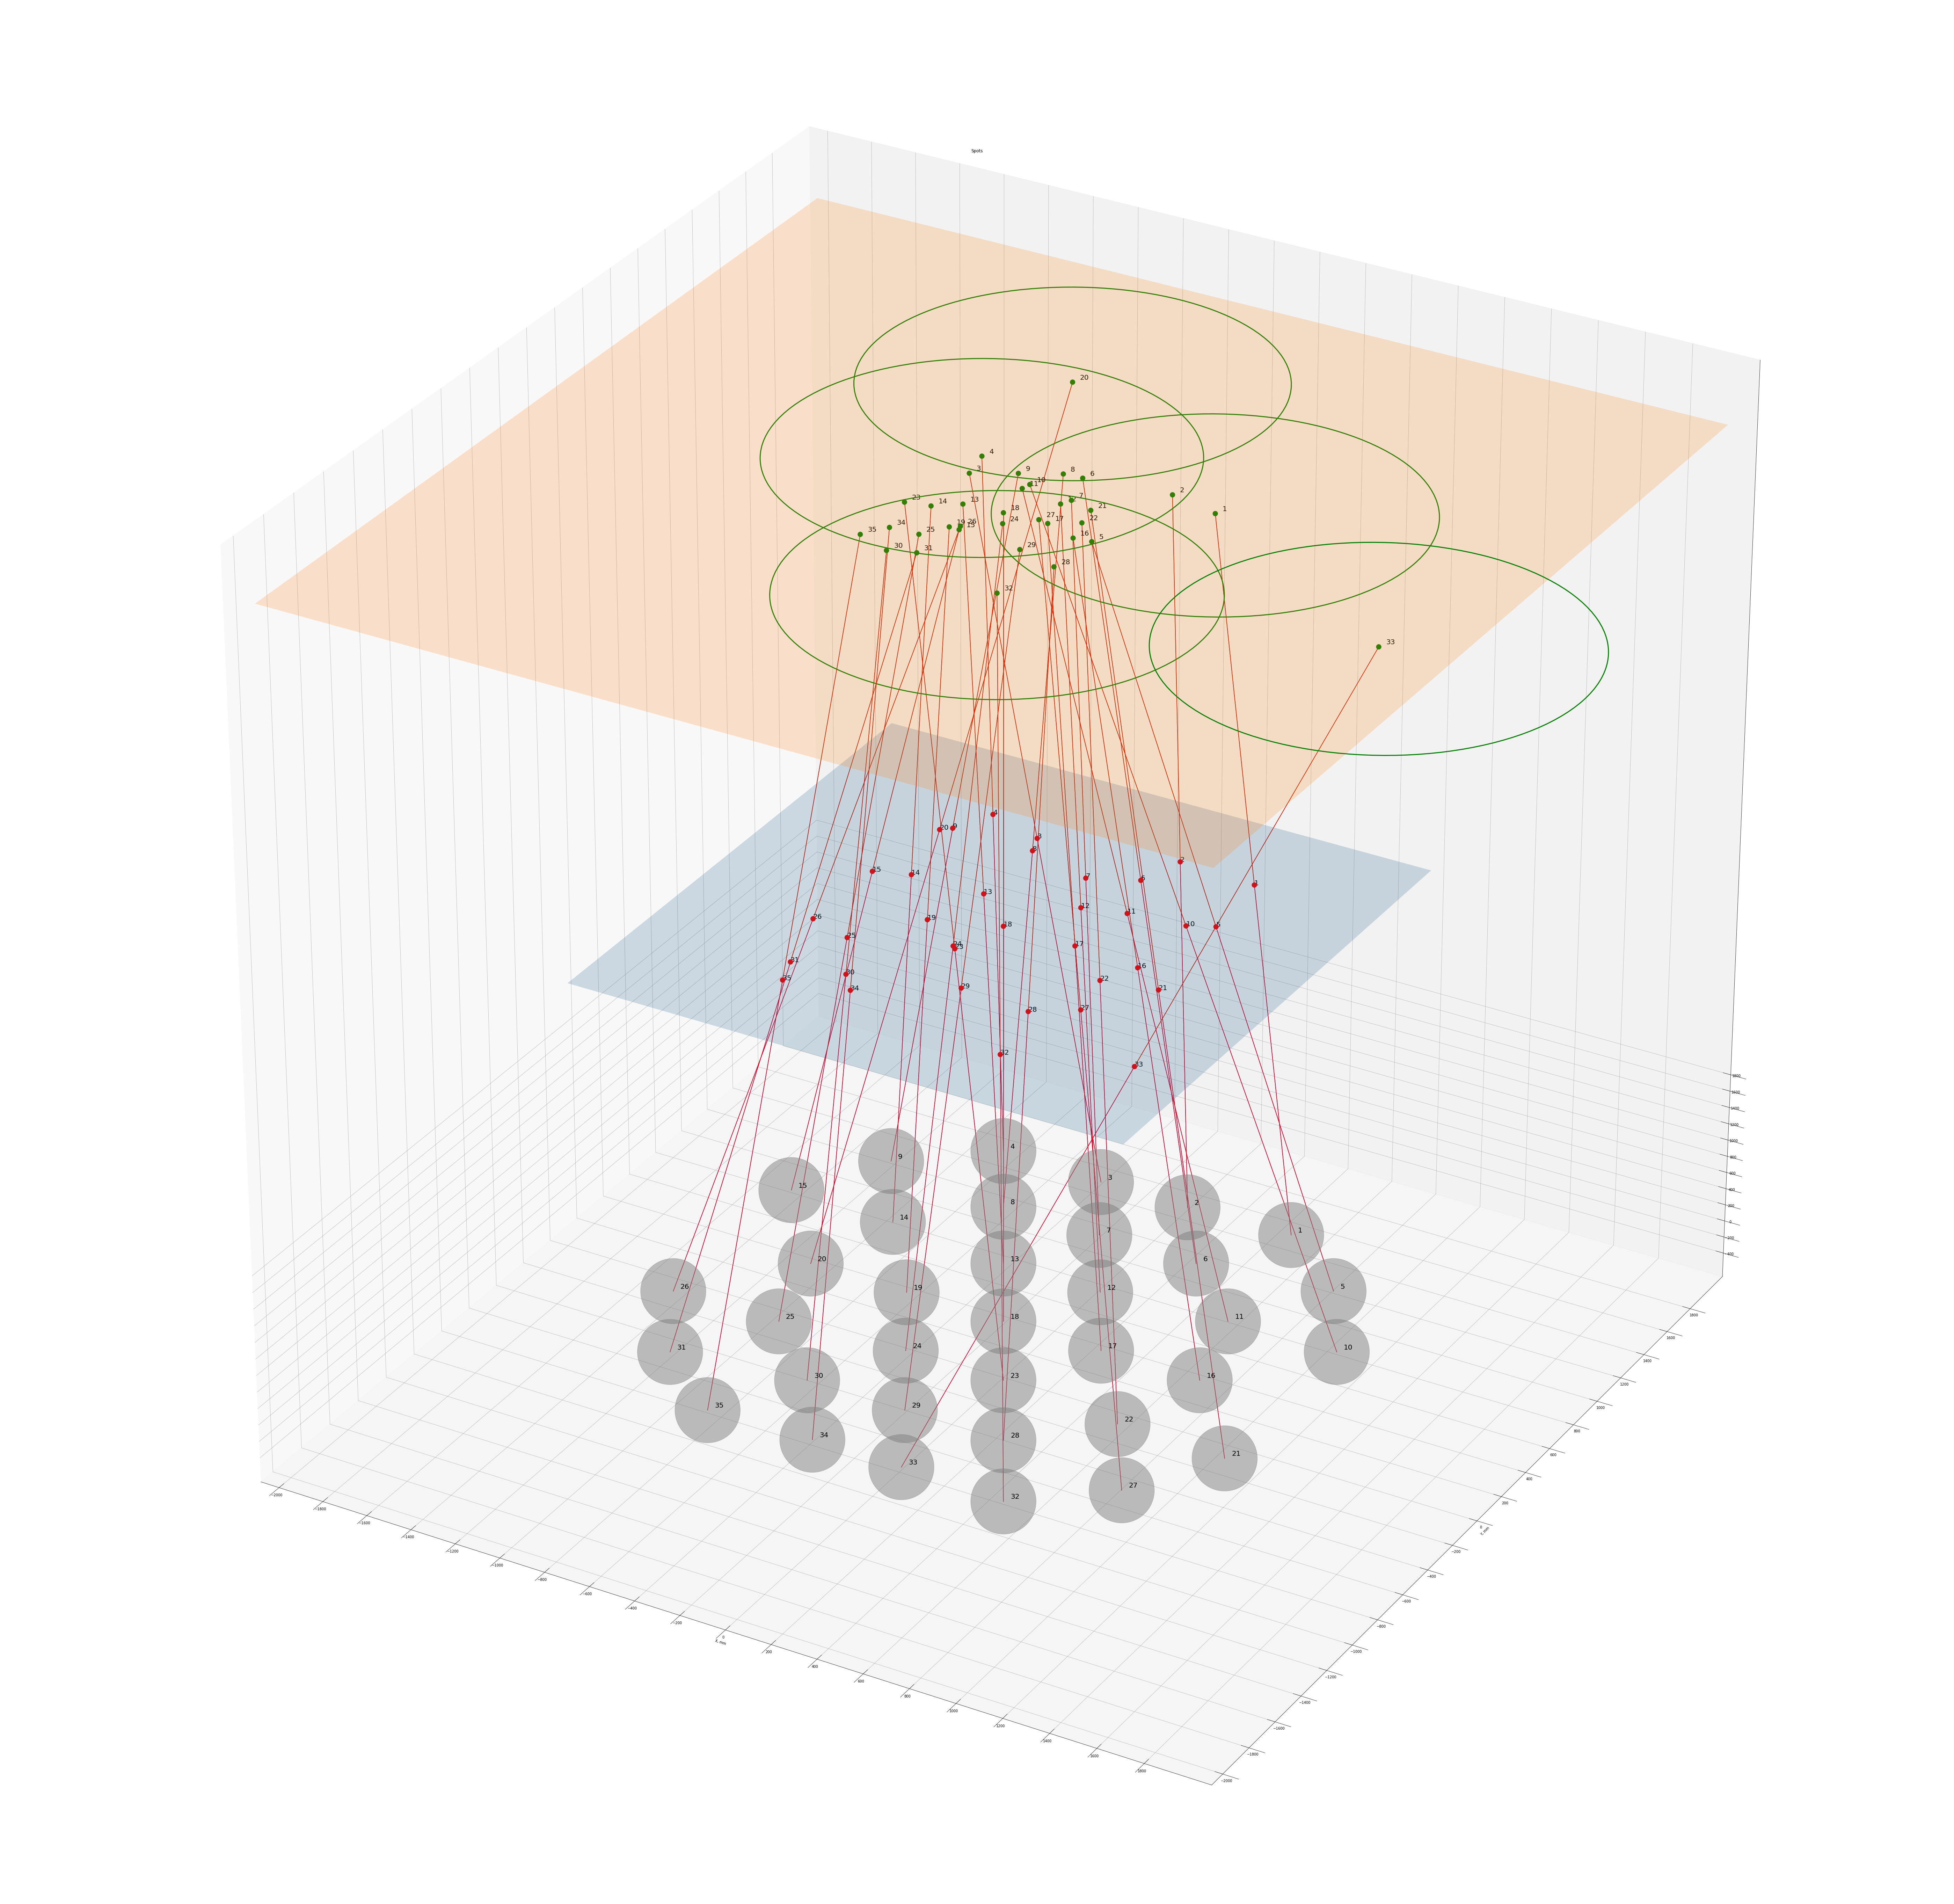

5.977694511413574


In [41]:
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d
import numpy as np
import pandas as pd
from multiprocessing import Process
import time

def x_y_in_double_focus_distance (x0, y0, z0, x1, y1, z1, z2):
    return [(z2-z0)*(x1 - x0)/(z1 - z0) + x0, (z2-z0)*(y1 - y0)/(z1 - z0) + y0]

def focal_plane_objects_formation (table):
    
    #########################################################################################################
    ## Formation of the focal plane objects ##
    #########################################
    
    ## The plane ##
    
    xs1 = np.linspace(-1200, 1200, 2)
    ys1 = np.linspace(-1200, 1200, 2)
    x1, y1 = np.meshgrid(xs1, ys1)
    z1 = 0*x1 + 0*y1 + 4750
    ax.plot_surface(x1, y1, z1, alpha=0.2)
    
    ## The circle ##
    
#    c1=Circle((0, 0), 1000, facecolor='none', edgecolor="red", linewidth=10, alpha=1)
#    ax.add_patch(c1)
#    art3d.pathpatch_2d_to_3d(c1, z=4750, zdir="z")
    
    ## The dots ##
    
    ax.scatter(table['x_coord'], table['y_coord'], F, color='red', s = 200, alpha=1);

def double_focal_plane_objects_formation(table):
    
    #########################################################################################################
    ## Formation of the double-focal plane objects ##
    ################################################
    
    ## The plane ##
    
    xs2 = np.linspace(-2000, 2000, 2)
    ys2 = np.linspace(-2000, 2000, 2)
    x2, y2 = np.meshgrid(xs2, ys2)
    z2 = 0*x2 + 0*y2 + 9500
    ax.plot_surface(x2, y2, z2, alpha=0.2, cstride=1, rstride=1, shade=False)
    
    ## The circle ##
    
#    c2=Circle((0, 0), 4000, facecolor='none', edgecolor="green", linewidth=10, alpha=1)
#    ax.add_patch(c2)
#    art3d.pathpatch_2d_to_3d(c2, z=9500, zdir="z")
    
    ## The tg_circle ##
    
#    c3=Circle((0, 0), 9500*np.tan(np.radians(5)), facecolor='none', edgecolor="green", linewidth=5, alpha=1)
#    ax.add_patch(c3)
#    art3d.pathpatch_2d_to_3d(c3, z=9500, zdir="z")    
    
    ## The dots ##
    
    ax.scatter(table[0], table[1], F2, color='green', s = 200, alpha=1);
    
    ## Bad circles ##
    
    for i in ([3, 31, 0, 19, 32]):
        c = Circle((table[0][i], table[1][i]), 9500*np.tan(np.radians(5)), facecolor='none', edgecolor="green", linewidth=3, alpha=1)
        ax.add_patch(c)
        art3d.pathpatch_2d_to_3d(c, z=9500, zdir="z")
    for i in ([19]):
        c = Circle((table[0][i], table[1][i]), 9500*np.tan(np.radians(5+1)), facecolor='none', edgecolor="blue", linewidth=1, alpha=0.7)
        ax.add_patch(c)
        art3d.pathpatch_2d_to_3d(c, z=9500, zdir="z")
    for i in ([19]):
        c = Circle((table[0][i], table[1][i]), 9500*np.tan(np.radians(5+2)), facecolor='none', edgecolor="blue", linewidth=1, alpha=0.6)
        ax.add_patch(c)
        art3d.pathpatch_2d_to_3d(c, z=9500, zdir="z")
    for i in ([32]):
        c = Circle((table[0][i], table[1][i]), 9500*np.tan(np.radians(5+1)), facecolor='none', edgecolor="blue", linewidth=1, alpha=0.7)
        ax.add_patch(c)
        art3d.pathpatch_2d_to_3d(c, z=9500, zdir="z")
    for i in ([32]):
        c = Circle((table[0][i], table[1][i]), 9500*np.tan(np.radians(5+2)), facecolor='none', edgecolor="blue", linewidth=1, alpha=0.6)
        ax.add_patch(c)
        art3d.pathpatch_2d_to_3d(c, z=9500, zdir="z")
    for i in ([32]):
        c = Circle((table[0][i], table[1][i]), 9500*np.tan(np.radians(5+3)), facecolor='none', edgecolor="blue", linewidth=1, alpha=0.5)
        ax.add_patch(c)
        art3d.pathpatch_2d_to_3d(c, z=9500, zdir="z")
    for i in ([32]):
        c = Circle((table[0][i], table[1][i]), 9500*np.tan(np.radians(5+4)), facecolor='none', edgecolor="blue", linewidth=1, alpha=0.4)
        ax.add_patch(c)
        art3d.pathpatch_2d_to_3d(c, z=9500, zdir="z")
    for i in ([32]):
        c = Circle((table[0][i], table[1][i]), 9500*np.tan(np.radians(5+5)), facecolor='none', edgecolor="blue", linewidth=1, alpha=0.3)
        ax.add_patch(c)
        art3d.pathpatch_2d_to_3d(c, z=9500, zdir="z")
    
    
    
def lines_formation(table1, table2):
    
    #########################################################################################################
    ## Formation of the lines between planes ##
    ##########################################
    
    ## Between mirrors and focal plane ##
    
    for i in range(len(table1)):
        z_line = [table1['z_kb'][i], table1["f_kb"][i]]
        x_line = [table1['x_coord'][i], table1["x_coord"][i]]
        y_line = [table1['y_coord'][i], table1["y_coord"][i]]
        ax.plot3D(x_line, y_line, z_line, 'red')
    
    ## Between focal plane and double-focal plane ##
        
    for i in range(len(table1)):
        z_line = [table1["f_kb"][i], 2*table1["f_kb"][i]]
        x_line = [table1["x_coord"][i], table2[0][i]]
        y_line = [table1["y_coord"][i], table2[1][i]]
        ax.plot3D(x_line, y_line, z_line, 'green')
    
    ## Between mirrors and double-focal plane ##
        
    for i in range(len(table1)):
        z_line = [table1['z_kb'][i], 2*table1["f_kb"][i]]
        x_line = [table1['x_coord'][i], table2[0][i]]
        y_line = [table1['y_coord'][i], table2[1][i]]
        ax.plot3D(x_line, y_line, z_line, 'blue')

        
def line_0_2_formation(table1, table2, color):
        
    for i in range(len(table1)):
        z_line = [Z_0[i], F2[i]]
        x_line = [table1['x_coord'][i], table2[0][i]]
        y_line = [table1['y_coord'][i], table2[1][i]]
        ax.plot3D(x_line, y_line, z_line, color)
        
def line_0_1_formation(table1, table2, color):
    
    for i in range(len(table1)):
        z_line = [Z_0[i], F[i]]
        x_line = [table1['x_coord'][i], table2["x_coord"][i]]
        y_line = [table1['y_coord'][i], table2["y_coord"][i]]
        ax.plot3D(x_line, y_line, z_line, color)
    
def line_1_2_formation(table1, table2, color):

    for i in range(len(table1)):
        z_line = [F[i], F2[i]]
        x_line = [table1["x_coord"][i], table2[0][i]]
        y_line = [table1["y_coord"][i], table2[1][i]]
        ax.plot3D(x_line, y_line, z_line, color)   

def mirrors_and_mirror_surface_formation(table):
    
    #########################################################################################################
    ## Formation of the mirrors and mirror surface ##
    ################################################
    
    ## Formation of the mirrors plates ##
    
    ax.scatter(table['x_coord'], table['y_coord'], Z_0, color='gray', s = 35000, alpha=0.5);
    
    ## Formation of the mirrors envelope curved surface ##
    
#    xs3 = np.linspace(-1500, 1500, 100)
#    ys3 = np.linspace(-1500, 1500, 100)
#    x3, y3 = np.meshgrid(xs3, ys3)
#    z3 = (9500**2 - x3**2 - y3**2)**0.5 + 9500
#    ax.plot_surface(x3, y3, z3, alpha=0.2, color='gray')
    
def double_focus_circles_formation(table):
    
    for i in range(len(table)):
        
        c3=Circle((table[0][i], table[1][i]), 9500*np.tan(np.radians(5)), facecolor='none', edgecolor="black", linewidth=10, alpha=0.5)
        ax.add_patch(c3)
        art3d.pathpatch_2d_to_3d(c3, z=9500, zdir="z")    

def annotation_formation(table1, table2, table3):
    
    #########################################################################################################
    ## Formation of the text numbers of all of the dots and mirrors ##
    #################################################################
    
    for g in range (len(mirror_df["number"])):
        ax.text(table1['x_coord'][g]+20, table1['y_coord'][g]+20, Z_0[g]+20, str(table1["number"][g]), size = 20)
        ax.text(table2['x_coord'][g], table2['y_coord'][g], F[g], str(table2["number"][g]), size = 20)
        ax.text(table3[0][g]+20, table3[1][g]+20, F2[g]+20, str(table1["number"][g]), size = 20)

f = 4750
F = [f]*35
F2 = [2*f]*35
Z_0 = [0]*35

time_start = time.time()

mirror = pd.read_csv('/home/yaroslav/Yaroslavus_GitHub/IACT_workshop_experiments/mirrors.csv',
                       sep=' ', names=['number','x_coord','y_coord'])
mirror_df = pd.DataFrame(mirror)

focal = pd.read_csv('/home/yaroslav/Yaroslavus_GitHub/IACT_workshop_experiments/focal.csv',
                       sep=' ', names=['number','x_coord','y_coord'])
focal_df = pd.DataFrame(focal)

xy_new = []
for i in range (len(mirror_df["number"])):
    xy_new.append(x_y_in_double_focus_distance(mirror_df['x_coord'][i], mirror_df['y_coord'][i], Z_0[i], focal_df["x_coord"][i], focal_df["y_coord"][i], F[i], F2[i]))
xy_new_df = pd.DataFrame(xy_new)



#########################################################################################################
## Setting the plot options ##
#############################

fig = plt.figure(figsize=(100,100))
ax = plt.axes(projection="3d")
## Axes labels and the title ##
plt.xlabel('X, mm')
plt.ylabel('Y, mm')
plt.title("Spots")
ax.set_xlim([-2000, 2000])
ax.set_ylim([-2000, 2000])
## Grid ##
major_ticks = np.arange(-2000, 2000, 200)
#minor_ticks = np.arange(-10000, 10000, 200)
ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)
ax.set_zticks(major_ticks)
#ax.set_zticks(minor_ticks, minor=True)
# And a corresponding grid
#ax.grid(which='both')
# Or if you want different settings for the grids:
#ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.8)

#########################################################################################################
## Formation of the processes ##
###############################

proc1 = Process(target = focal_plane_objects_formation(focal_df), args = (), name = 'focal_plane_objects_formation')
proc2 = Process(target = double_focal_plane_objects_formation(xy_new_df), args = (), name = 'double_focal_plane_objects_formation')
proc3 = Process(target = line_0_1_formation(mirror_df, focal_df, 'blue'), args = (), name = 'line_0_1_formation')
proc4 = Process(target = line_1_2_formation(focal_df, xy_new_df, 'green'), args = (), name = 'line_1_2_formation')
proc5 = Process(target = line_0_2_formation(mirror_df, xy_new_df, 'red'), args = (), name = 'line_0_2_formation')
proc6 = Process(target = mirrors_and_mirror_surface_formation(mirror_df), args = (), name = 'mirrors_and_mirror_surface_formation')
#proc7 = Process(target = double_focus_circles_formation(xy_new_df), args = (), name = 'double_focus_circles_formation')
proc8 = Process(target = annotation_formation(mirror_df, focal_df, xy_new_df), args = (), name = 'annotation_formation')

#########################################################################################################
## Formation of the focal plane objects ##
#########################################

proc1.start()

#########################################################################################################
## Formation of the double-focal plane objects ##
################################################  

proc2.start()

#########################################################################################################
## Formation of the lines between planes ##
##########################################

proc3.start()
proc4.start()
proc5.start()

#########################################################################################################
## Formation of the mirrors and mirror surface_1 ##
##################################################

proc6.start()

#########################################################################################################
## Formation of the mirrors and mirror surface_2 ##
##################################################

#proc7.start()

#########################################################################################################
## Formation of the text numbers of all of the dots and mirrors ##
#################################################################

proc8.start()

#########################################################################################################
## All processes status ##
#########################

#while True:
#    print(str(time.time - time_start)
#    if proc1.Process.is_alive() == True: print('focal_plane_objects_formation...' + 'is working')
#    if proc2.is_alive(): print('double_focal_plane_objects_formation...' + 'is working')
#    if proc3.is_alive(): print('line_0_1_formation...' + 'is working')
#    if proc4.is_alive(): print('line_1_2_formation...' + 'is working')
#    if proc5.is_alive(): print('line_0_2_formation...' + 'is working')
#    if proc6.is_alive(): print('mirrors_and_mirror_surface_formation...' + 'is working')
#    if proc7.is_alive(): print('double_focus_circles_formation...' + 'is working')
#    if proc8.is_alive(): print('annotation_formation...' + 'is working')
#    time.sleep(1)

#########################################################################################################
## All processes terminating ##
##############################

proc1.join()
proc2.join()
proc3.join()
proc4.join()
proc5.join()
proc6.join()
#proc7.join()
proc8.join()
#########################################################################################################
## File saving ##
################

#plt.savefig('try', fmt='png')
#plt.savefig('try', fmt='pdf')

plt.show()

print(time.time() - time_start)